In [18]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display


plt.style.use("default")


# Распределение Коши

## Общие сведения

Распределение Коши - это непрерывное распределение вероятностей с тяжёлыми хвостами.

В библиотеке `scipy.stats` распределение реализовано как объект  
`scipy.stats.cauchy`, являющийся наследником класса `rv_continuous`.

---

## Плотность вероятности

Плотность вероятности стандартного распределения Коши задаётся формулой:

$$
f(x) = \frac{1}{\pi \left(1 + x^2\right)}, \quad x \in \mathbb{R}
$$

В общем случае, с параметрами сдвига `loc = \mu` и масштаба `scale = \gamma`:

$$
f(x; \mu, \gamma) =
\frac{1}{\pi \gamma}
\cdot
\frac{1}{1 + \left( \frac{x - \mu}{\gamma} \right)^2}
$$

Связь со стандартным распределением:

$$
y = \frac{x - \mu}{\gamma}
$$

---

## Функция распределения (CDF)

Функция распределения имеет аналитический вид:

$$
F(x) =
\frac{1}{\pi}
\arctan\left( \frac{x - \mu}{\gamma} \right)
+ \frac{1}{2}
$$

Встроенное использование в `scipy`:

- `cauchy.cdf(x, loc=μ, scale=γ)`
- `cauchy.logcdf(x, loc=μ, scale=γ)`

---

## Квантили (PPF)

Обратная функция распределения (percent point function):

$$
F^{-1}(q) =
\mu + \gamma
\tan\left(
\pi \left(q - \frac{1}{2}\right)
\right),
\quad 0 < q < 1
$$

Используется для вычисления перцентилей.

---

## Случайные выборки

Случайные величины $X_1, \dots, X_n \sim \text{Cauchy}(\mu, \gamma)$ генерируются как:

`scipy.stats.cauchy.rvs(loc=μ, scale=γ, size=n)`

In [16]:
def show_pdf(pdf, xmin, xmax, grid_size, distr_name, **kwargs):
    """
    Рисует график плотности непрерывного распределения
    
    pdf - плотность
    xmin, xmax - границы графика по оси x
    grid_size - размер сетки, по которой рисуется график
    distr_name - название распределения
    kwargs - параметры плотности
    """
    X = np.linspace(xmin, xmax, grid_size)
    Y = pdf(X, **kwargs)
    ymax = max(Y) + 0.1
    plt.figure(figsize=(6, 3))
    plt.plot(X, Y, lw=3)
    plt.grid(ls=':')
    plt.xlabel('Значение', fontsize=10)
    plt.ylabel('Плотность', fontsize=10)
    plt.xlim((xmin, xmax))
    plt.ylim((-0.05, ymax))
    title = 'Плотность {}'.format(distr_name)
    plt.title(title.format(**kwargs), fontsize=14)
    plt.show()
    
def plot_cauchy(loc=0, scale=1, n_points=10000):
    """
    Отрисовывает распределение случайных точек по закону Коши
    loc – параметр сдвига (медиана)
    scale – параметр масштаба
    n_points - число наблюдений в выборке
    """
    plt.figure(figsize=(6, 3))
    sample = sts.cauchy.rvs(loc=loc, scale=scale, size=n_points)
    plt.hist(sample, bins=50, density=True, alpha=0.6, label='Гистограмма выборки', range=(loc-10*scale, loc+10*scale))
    
    grid = np.linspace(loc-10*scale, loc+10*scale, 1000)
    plt.plot(grid, sts.cauchy.pdf(grid, loc=loc, scale=scale), 
             color='red', lw=3, label='Плотность случайной величины')
    
    plt.title(r'Случайная величина $X \sim Cauchy(loc={}, scale={})$'.format(loc, scale), fontsize=14)
    plt.legend(fontsize=10, loc='upper right')
    plt.grid(ls=':')
    plt.show()

Исследование плотности распределения Коши


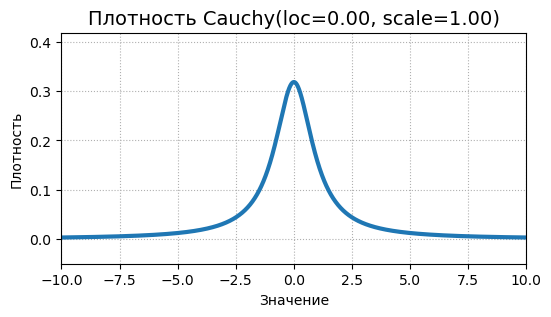

In [8]:
print("=" * 60)
print("Исследование плотности распределения Коши")
print("=" * 60)

show_pdf(
    pdf=sts.cauchy.pdf,
    xmin=-10, xmax=10, grid_size=10000,
    distr_name='Cauchy(loc={loc:.2f}, scale={scale:.2f})',
    loc=0, scale=1
)

In [14]:
print("\n" + "=" * 60)
print("Интерактивное исследование зависимости плотности от параметров")
print("=" * 60)

ip = widgets.interactive(
    show_pdf,
    pdf=widgets.fixed(sts.cauchy.pdf),
    grid_size=widgets.fixed(1000),
    xmin=widgets.FloatSlider(min=-30, max=0, step=0.5, value=-10, description='x_min'),
    xmax=widgets.FloatSlider(min=0, max=30, step=0.5, value=10, description='x_max'),
    loc=widgets.FloatSlider(min=-10, max=10, step=0.1, value=0, description='loc'),
    scale=widgets.FloatSlider(min=0.1, max=5, step=0.1, value=1, description='scale'),
    distr_name=widgets.fixed('Cauchy(loc={loc:.2f}, scale={scale:.2f})')
)

print("Настройте параметры:")
print("- x_min, x_max: границы отображения графика")
print("- loc (x₀): сдвиг распределения вдоль оси X (медиана)")
print("- scale (γ): ширина распределения")

display(ip)


Интерактивное исследование зависимости плотности от параметров
Настройте параметры:
- x_min, x_max: границы отображения графика
- loc (x₀): сдвиг распределения вдоль оси X (медиана)
- scale (γ): ширина распределения


interactive(children=(FloatSlider(value=-10.0, description='x_min', max=0.0, min=-30.0, step=0.5), FloatSlider…


Сравнение гистограммы и плотности распределения Коши


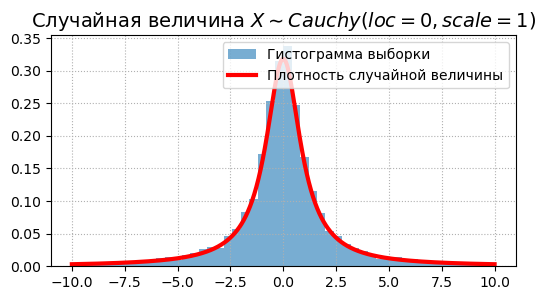

In [17]:
print("\n" + "=" * 60)
print("Сравнение гистограммы и плотности распределения Коши")
print("=" * 60)

plot_cauchy(loc=0, scale=1, n_points=10000)


Сравнение плотностей распределения Коши при разных параметрах


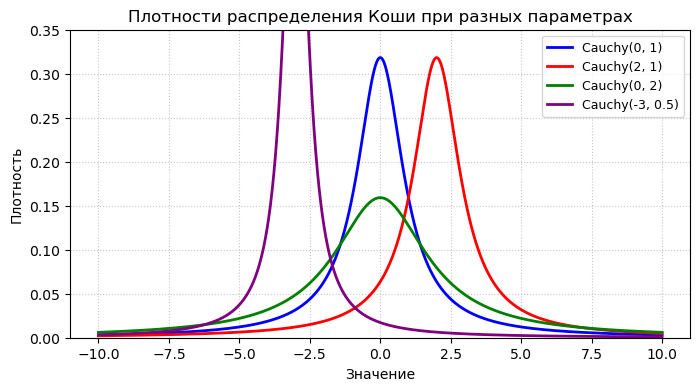

In [11]:
print("\n" + "=" * 60)
print("Сравнение плотностей распределения Коши при разных параметрах")
print("=" * 60)

plt.figure(figsize=(8, 4))
grid = np.linspace(-10, 10, 1000)

# Разные комбинации параметров
params = [
    {'loc': 0, 'scale': 1, 'label': 'Cauchy(0, 1)', 'color': 'blue'},
    {'loc': 2, 'scale': 1, 'label': 'Cauchy(2, 1)', 'color': 'red'},
    {'loc': 0, 'scale': 2, 'label': 'Cauchy(0, 2)', 'color': 'green'},
    {'loc': -3, 'scale': 0.5, 'label': 'Cauchy(-3, 0.5)', 'color': 'purple'}
]

for param in params:
    plt.plot(grid, sts.cauchy.pdf(grid, loc=param['loc'], scale=param['scale']), 
             lw=2, color=param['color'], label=param['label'])

plt.title('Плотности распределения Коши при разных параметрах', fontsize=12)
plt.xlabel('Значение', fontsize=10)
plt.ylabel('Плотность', fontsize=10)
plt.legend(fontsize=9)
plt.grid(ls=':', alpha=0.7)
plt.ylim(0, 0.35)
plt.show()


Сравнение распределения Коши и нормального распределения


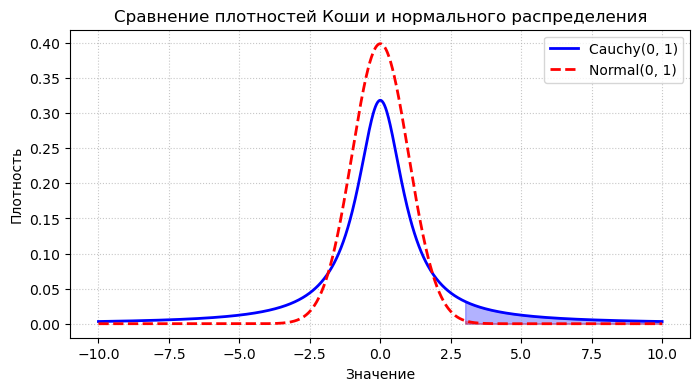

Примечание: У распределения Коши более 'тяжелые' хвосты,
что видно по большей вероятности экстремальных значений
(закрашенные области при x > 3)


In [34]:
print("\n" + "=" * 60)
print("Сравнение распределения Коши и нормального распределения")
print("=" * 60)

plt.figure(figsize=(8, 4))
x = np.linspace(-10, 10, 1000)

# Распределение Коши и нормальное с теми же параметрами
cauchy_pdf = sts.cauchy.pdf(x, loc=0, scale=1)
normal_pdf = sts.norm.pdf(x, loc=0, scale=1)

plt.plot(x, cauchy_pdf, 'b-', lw=2, label='Cauchy(0, 1)')
plt.plot(x, normal_pdf, 'r--', lw=2, label='Normal(0, 1)')
plt.fill_between(x[x > 3], 0, cauchy_pdf[x > 3], alpha=0.3, color='blue')
plt.fill_between(x[x > 3], 0, normal_pdf[x > 3], alpha=0.3, color='red')

plt.title('Сравнение плотностей Коши и нормального распределения', fontsize=12)
plt.xlabel('Значение', fontsize=10)
plt.ylabel('Плотность', fontsize=10)
plt.legend(fontsize=10)
plt.grid(ls=':', alpha=0.7)
plt.show()

print("Примечание: У распределения Коши более 'тяжелые' хвосты,")
print("что видно по большей вероятности экстремальных значений")
print("(закрашенные области при x > 3)")